In [1]:
from nanomesh.generator import Generator
import SimpleITK as sitk
from nanomesh.utils import show_slice, show_volume, generate_mesh_from_binary_image

import numpy as np

import math

In [2]:
gen = Generator(680, math.sqrt(2)*680, 0.24*680)

# Possible rotation/transformation of the coordinate system
theta = math.pi * 1/180
c = math.cos(theta)
s = math.sin(theta)
trans = np.array([
    [ c, 0, s],
    [ 0, 1, 0],
    [-s, 0, c]
])

vol = gen.generate([100,100,100], [10,10,10], transform=trans, bin_val=[0.,1.])

# Convert to ITK image

im = sitk.GetImageFromArray(vol.astype('uint8'))
show_slice(im, dim='z',scale=2)

interactive(children=(IntSlider(value=49, description='z', max=99), Output()), _dom_classes=('widget-interact'…

In [3]:
import pygalmesh
mesh = generate_mesh_from_binary_image(im, h=[2.5]*3, perturb=False, 
                                       lloyd=False,
                                       odt=False,
                                       max_radius_surface_delaunay_ball=0.0,
                                       max_cell_circumradius=0.,
                                       max_facet_distance=1.,
                                       exude=True,
                                       min_facet_angle=0.,
                                       max_edge_size_at_feature_edges=1.5,
                                       max_circumradius_edge_ratio=0.,
                                       bounding_box=False)
import pyvista as pv
pv.plot_itk(mesh)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [4]:
import pygalmesh
class Implicit3D(pygalmesh.DomainBase):
    def __init__(self):
        super().__init__()
        
        self.gen = Generator(680, math.sqrt(2)*680, 0.24*680)

        # Possible rotation/transformation of the coordinate system
        theta = math.pi * 1/180
        c = math.cos(theta)
        s = math.sin(theta)
        trans = np.array([
            [ c, 0, s],
            [ 0, 1, 0],
            [-s, 0, c]
        ])
        
        self.size = [100]*3
        self.res = [10]*3
        self.data = self.gen.generate(self.size, self.res, transform=trans, bin_val=[0.,1.])
        
    
    def eval(self, x):
        ix = int(x[0]/self.res[0]) % 68
        iy = int(x[1]/self.res[1]) % 100 
        iz = int(x[2]/self.res[2]) % 100
        return self.data[ix,iy,iz]
        
mesh = pygalmesh.generate_periodic_mesh(
    Implicit3D(),
    [0,0,0,680,1000,1000],
    max_radius_surface_delaunay_ball=0.0,
    max_cell_circumradius=0.,
    max_facet_distance=1.,
    min_facet_angle=0.,
    max_circumradius_edge_ratio=0.
    )

KeyboardInterrupt: 

In [6]:
import meshio
meshio.write('test.msh', mesh, file_format='gmsh22', binary=False)

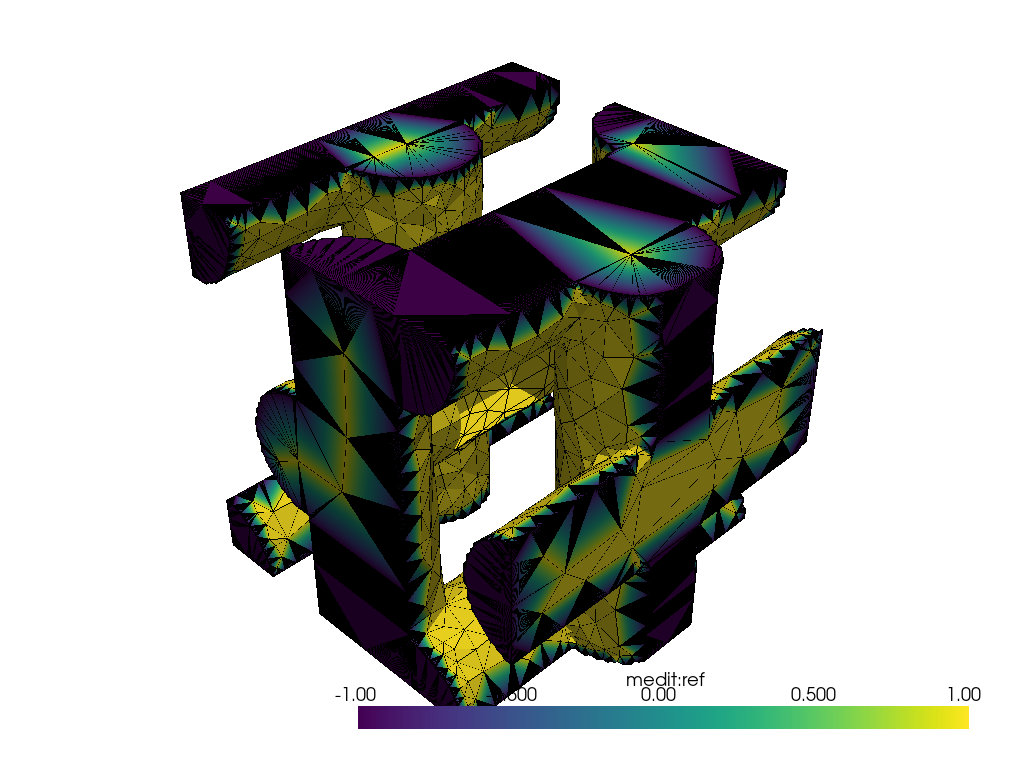

[(361.19005807626024, 361.20540053068623, 361.19864797170237),
 (74.23686512932181, 74.2522075837478, 74.24545502476394),
 (0.0, 0.0, 1.0)]

In [17]:
import meshio

meshio.write('ideal_twophase.vtk',mesh)

vtkmesh = pv.read('ideal_twophase.vtk')

bounds = [50,100,50,100,50,100]
clipped = vtkmesh.clip_box(bounds)
pv.set_plot_theme("document")

p = pv.Plotter(notebook=True)
p.add_mesh(vtkmesh, style='wireframe', color='black')
p.add_mesh(clipped)
p.show(use_ipyvtk=False)


In [3]:
import numpy
import pygalmesh


class Schwarz(pygalmesh.DomainBase):
    def __init__(self):
        super().__init__()

    def eval(self, x):
        x2 = numpy.cos(x[0] * 2 * numpy.pi)
        y2 = numpy.cos(x[1] * 2 * numpy.pi)
        z2 = numpy.cos(x[2] * 2 * numpy.pi)
        return x2 + y2 + z2


mesh = pygalmesh.generate_periodic_mesh(
    Schwarz(),
    [0, 0, 0, 1, 1, 1],
    max_cell_circumradius=0.05,
    min_facet_angle=30,
    max_radius_surface_delaunay_ball=0.05,
    max_facet_distance=0.025,
    max_circumradius_edge_ratio=2.0,
    number_of_copies_in_output=4,
    # odt=True,
    # lloyd=True,
    verbose=False,
)


In [4]:
import meshio
meshio.write('periodic.msh', mesh, file_format='gmsh22', binary=False)